In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import zeros
import matplotlib.pyplot as plt
from keras.utils import plot_model

from tensorflow.data import Dataset
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from tensorflow.keras.metrics import AUC


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential, backend

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping


from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import ParameterGrid, train_test_split
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, Input
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from keras.layers import Dense, Activation, Reshape, Dropout, Input, Flatten, Concatenate


from sklearn.pipeline import Pipeline




from sklearn.impute import SimpleImputer
from keras.models import Sequential, Model
from keras.layers import Embedding
# from keras.layers.embeddings import Embedding


from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor





In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

import matplotlib.pyplot as plt
#from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler


# convert csv train file to dataframe
path = '/content/drive/MyDrive/train.csv'

df = pd.read_csv(path)
df.sample(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20346,58,blue-collar,divorced,secondary,no,1103,yes,no,cellular,2,feb,226,1,202,4,failure,0
27070,33,blue-collar,single,primary,no,-104,yes,no,cellular,15,may,34,10,331,16,other,0
17243,58,management,married,tertiary,no,1831,no,no,cellular,17,nov,1531,1,-1,0,unknown,0
12277,29,technician,single,secondary,no,426,yes,no,telephone,29,jul,121,6,-1,0,unknown,0
16407,54,management,divorced,tertiary,no,124,no,no,cellular,27,aug,119,11,-1,0,unknown,0


In [3]:
# delete unwanted featues that has effect on predicting y
# df.drop(columns=['contact', 'day', 'month'], inplace=True)
df.drop(columns=['day', 'month'], inplace=True)
df.sample(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
6769,57,unknown,married,secondary,no,2,no,no,unknown,112,4,-1,0,unknown,0
20628,36,services,single,secondary,no,774,yes,no,cellular,231,2,259,1,failure,0
4092,28,blue-collar,single,secondary,no,48,no,no,unknown,144,3,-1,0,unknown,0
30038,21,student,single,secondary,no,210,no,no,telephone,123,2,174,1,failure,0
25640,32,technician,married,secondary,no,522,yes,yes,cellular,272,5,258,4,failure,0


In [4]:
# convert csv test file to dataframe
path_test = '/content/drive/MyDrive/test.csv'

df_test = pd.read_csv(path_test)
df_test.sample(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
11198,33,services,married,secondary,no,210,yes,no,cellular,13,may,1207,2,-1,0,unknown,1
6876,50,blue-collar,married,primary,no,1617,no,no,cellular,26,aug,55,4,-1,0,unknown,0
3187,40,admin.,married,secondary,no,0,no,no,unknown,16,jun,368,12,-1,0,unknown,0
217,37,admin.,single,secondary,no,569,yes,yes,unknown,6,may,126,2,-1,0,unknown,0
6586,40,management,married,tertiary,no,2014,no,no,cellular,20,aug,209,5,-1,0,unknown,0


In [5]:
# delete unwanted features that has effect on predicting y
df_test.drop(columns=['day', 'month'], inplace=True)
#df_test.drop(columns=['contact', 'day', 'month'], inplace=True)
df_test.sample(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
6579,54,unknown,married,unknown,no,390,no,no,cellular,68,5,-1,0,unknown,0
13209,24,admin.,single,tertiary,no,674,yes,no,cellular,267,1,-1,0,unknown,1
13184,57,unknown,married,primary,no,1884,no,no,telephone,133,4,-1,0,unknown,0
12126,28,management,single,tertiary,no,9314,no,no,cellular,276,2,-1,0,unknown,1
1492,32,technician,single,tertiary,no,4665,yes,no,unknown,860,2,-1,0,unknown,1


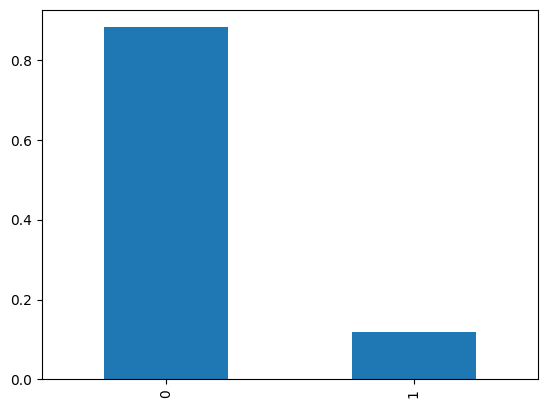

In [6]:
# plot showing the proportion of positive and negative class of y in the train data

df.y.value_counts(normalize=True).plot(kind='bar');

In [7]:
# number of 1 and 0
count_class_0, count_class_1 = df.y.value_counts()
print(count_class_0)
print('\n')
print(count_class_1)

27920


3728


In [8]:
# divide by class
df_class_0 = df[df['y'] == 0]
df_class_1 = df[df['y'] == 1]

Random over-sampling:
0    27920
1    27920
Name: y, dtype: int64


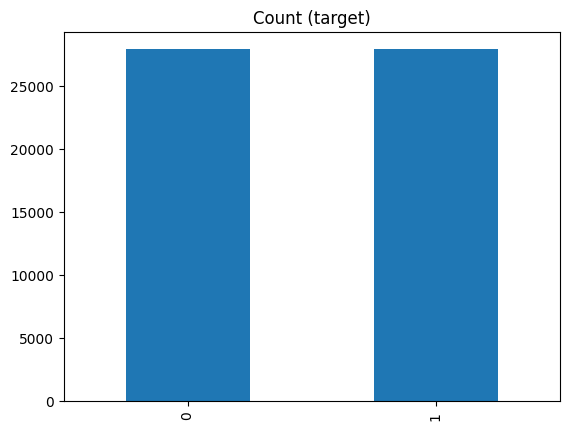

In [9]:
# oversampling of imbalanced train data

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.y.value_counts())
df_over.y.value_counts().plot(kind='bar', title='Count (target)');


In [10]:
# identy numeric and categorical data

#TARGET = 'y'
#FEATURES = df.columns.drop(TARGET)

#NUMERICAL = df[FEATURES].select_dtypes('number').columns
#print(f"Numerical features: {', '.join(NUMERICAL)}")

#CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL))
#print(f"Categorical features: {', '.join(CATEGORICAL)}")


# get numerical and categorical features
y = 'y'
X = df.columns.drop(y)

NUMERICAL = df[X].select_dtypes(exclude='object').columns
print(f"Numerical features: {', '.join(NUMERICAL)}")

CATEGORICAL = df[X].select_dtypes(include='object').columns
print(f"Categorical features: {', '.join(CATEGORICAL)}")

Numerical features: age, balance, duration, campaign, pdays, previous
Categorical features: job, marital, education, default, housing, loan, contact, poutcome


In [11]:
# pipeline for preprocessing data

numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])

In [12]:
# split datset into train an test set
X_train = df_over.drop('y', axis=1)
y_train = df_over['y']
X_test = df_test.drop('y', axis=1)
y_test = df_test['y']


In [13]:
# preprocessing data

X_train = preprocessors.fit_transform(X_train)
#,columns=[['quenchTime', 'forgeTime', 'smallDefects', 'largeDefects',
#'sliverDefects', 'partType', 'microstructure', 'seedLocation',
#'castType']])

X_test = preprocessors.transform(X_test)
#,columns=[['quenchTime', 'forgeTime', 'smallDefects', 'largeDefects',
#'sliverDefects', 'partType', 'microstructure', 'seedLocation',
#'castType']])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
# Instantiate the LGBM
#model = LGBMClassifier()
model = XGBClassifier()
#model = DecisionTreeClassifier()

# Fit the classifier to the training data
model.fit(X_train, y_train)

# Perform prediction
y_pred = model.predict(X_test)

# Print the accuracy
#print(lgbm.score(X_test, y_test))

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC score:", roc_auc)


print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

ROC AUC score: 0.8021441226803862
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     12002
           1       0.40      0.75      0.52      1561

    accuracy                           0.84     13563
   macro avg       0.68      0.80      0.72     13563
weighted avg       0.90      0.84      0.86     13563

